#### Library Prep

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

### Load and Inspect the data 

In [3]:
df = pd.read_csv('FuelConsumption.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Exploratory Data Analysis

In [7]:
sns.set_style('darkgrid')

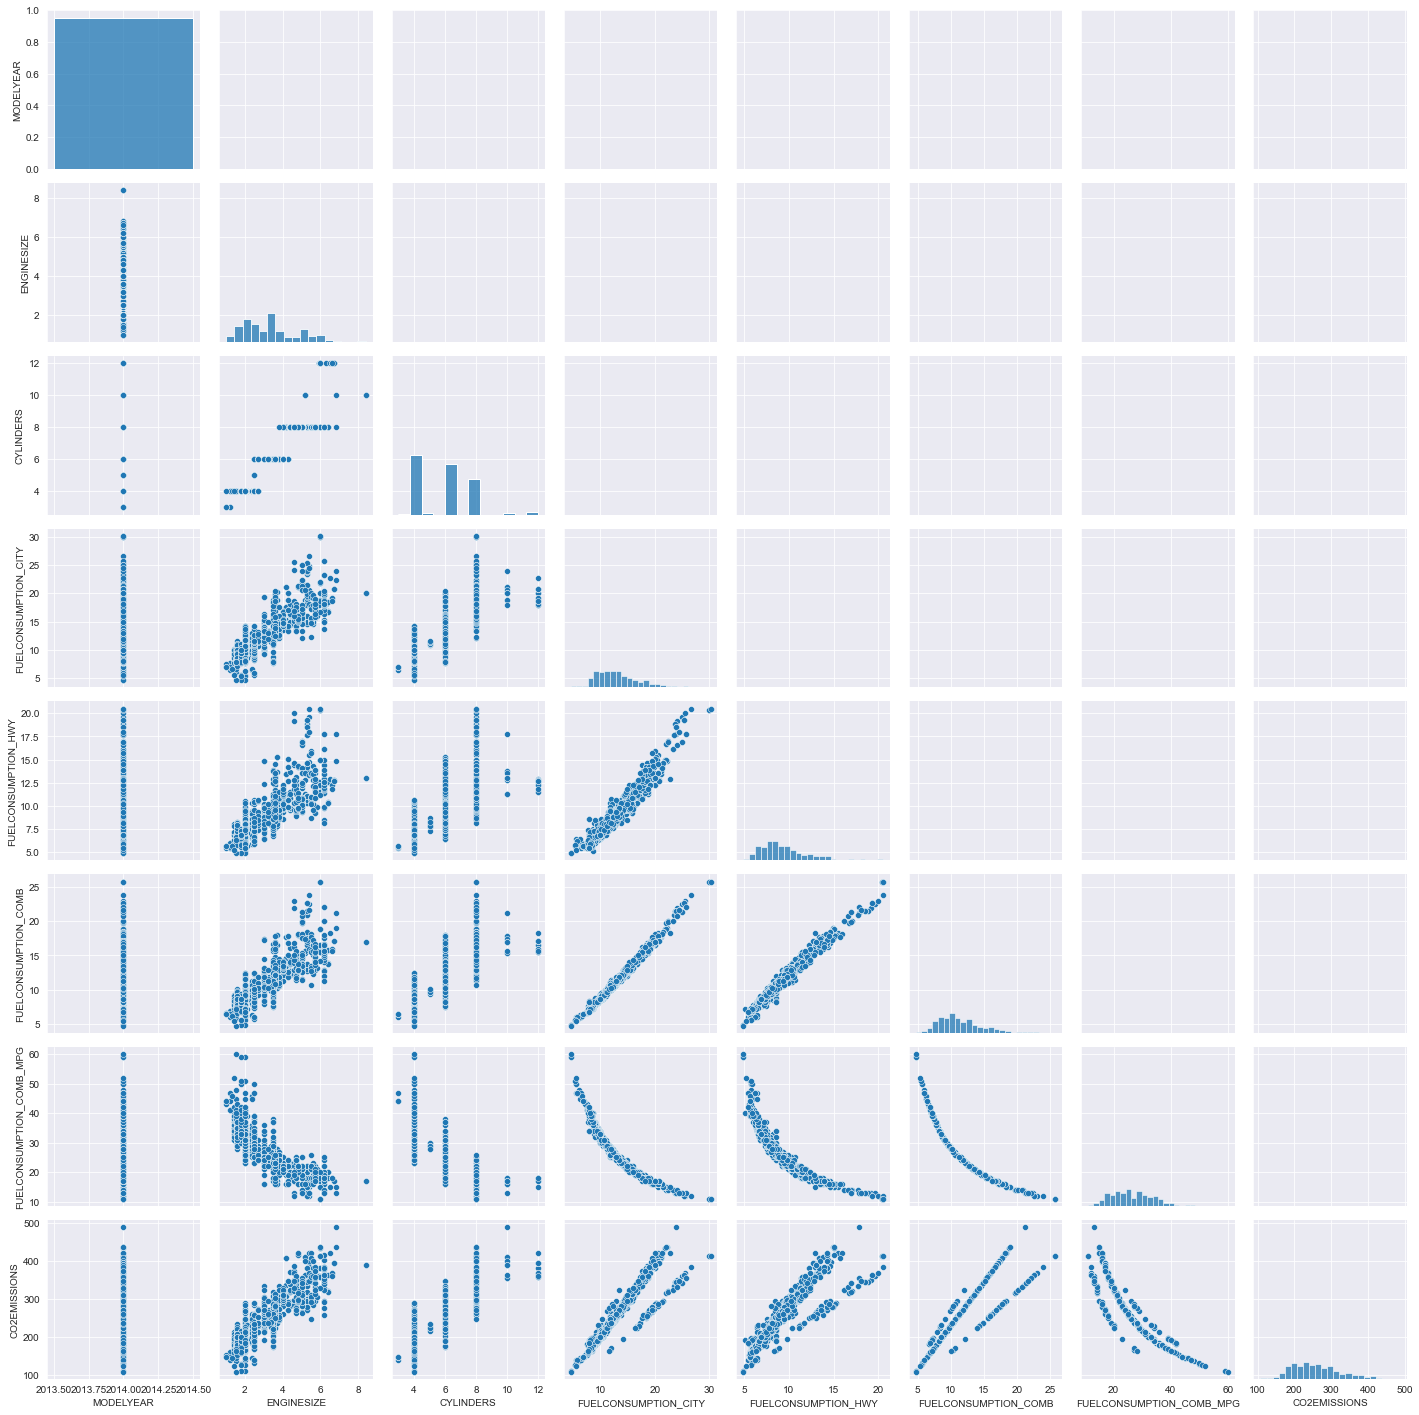

In [8]:
g = sns.PairGrid(df)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot);

### Simple Linear Regression

In [9]:
X = df[['ENGINESIZE']]
y = df.CO2EMISSIONS

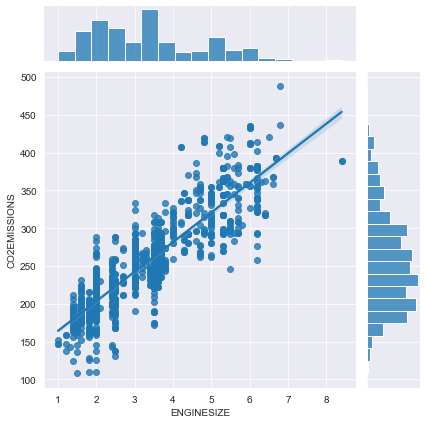

In [10]:
g = sns.JointGrid(data=df, x='ENGINESIZE', y='CO2EMISSIONS')
g.plot(sns.regplot, sns.histplot);

#### 1. Scikit-Learn Approach

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lm = LinearRegression()

In [14]:
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Coefficient:', lm.coef_)
print('Intercept: ', lm.intercept_)

Coefficient: [38.99297872]
Intercept:  126.28970217408721


In [16]:
pred = lm.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
print(f"R^2 score: {metrics.r2_score(y_test, pred):.3f}")

R^2 score: 0.762


### Model Persistence
After training a scikit-learn model, it is desirable to have a way to persist the model for future use without having to retrain.[$^{[1]}$]( https://scikit-learn.org/stable/modules/model_persistence.html)

Use sckikit-learn's implementation of Python's pickle:

In [19]:
import joblib
joblib.dump(lm, 'linear_model.joblib')

['linear_model.joblib']

#### To load back the pickled model, do:

In [20]:
lm_reloaded = joblib.load('linear_model.joblib')

__Check that the reloaded model retains the same properties (coeff, intercept)__

In [21]:
print('Coefficients Equal?:', lm.coef_ == lm_reloaded.coef_)
print('Intercepts Equal?: ', lm.intercept_ == lm_reloaded.intercept_)

Coefficients Equal?: [ True]
Intercepts Equal?:  True


### Statistical Linear Regression

In descriptive statistics, training a model is not the goal. We simply wish to describe the linear regression between variables. For this we use the statsmodel api:

#### 2. Statsmodels Approach

In [22]:
import statsmodels.api as sm

In [23]:
x = sm.add_constant(data=X, prepend=True, has_constant='skip')

In [24]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:54:32   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.3041      2.420     51.779      0.000     120.556     130.053
ENGINESIZE    39.1252      0.666     58.741      0.000      37.818      40.432
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.126   Prob(JB):                     1.71e-12
Kurtosis:                       4.075   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Statsmodels approach No. 2

In [25]:
model2 = sm.OLS.from_formula('CO2EMISSIONS ~ ENGINESIZE', data=df)

In [26]:
results = model2.fit()

In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     3451.
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:54:33   Log-Likelihood:                -5169.9
No. Observations:                1067   AIC:                         1.034e+04
Df Residuals:                    1065   BIC:                         1.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.3041      2.420     51.779      0.000     120.556     130.053
ENGINESIZE    39.1252      0.666     58.741      0.000      37.818      40.432
==============================================================================
Omnibus:                       27.459   Durbin-Watson:                   0.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.194
Skew:                           0.126   Prob(JB):                     1.71e-12
Kurtosis:                       4.075   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""